In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [3]:
torch.manual_seed(32)

In [4]:
model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("./iris.csv")

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [9]:
X = df.drop('target',axis=1)

In [10]:
y = df['target']

In [11]:
X = X.values
y = y.values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [14]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [15]:
criterion = nn.CrossEntropyLoss()

In [16]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [17]:
model.parameters()

<generator object Module.parameters at 0x7f514e61f6d0>

In [18]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [19]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred,y_train)
    losses.append(loss.item())
    
    if i%10==0:
        print(f"Epoch:{i} and loss is:{loss}")
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:0 and loss is:1.1759154796600342
Epoch:10 and loss is:0.9613615870475769
Epoch:20 and loss is:0.8002832531929016
Epoch:30 and loss is:0.6383519768714905
Epoch:40 and loss is:0.43816983699798584
Epoch:50 and loss is:0.2928074598312378
Epoch:60 and loss is:0.17973047494888306
Epoch:70 and loss is:0.11343837529420853
Epoch:80 and loss is:0.0821346864104271
Epoch:90 and loss is:0.06710203737020493


Text(0.5, 0, 'Epoch')

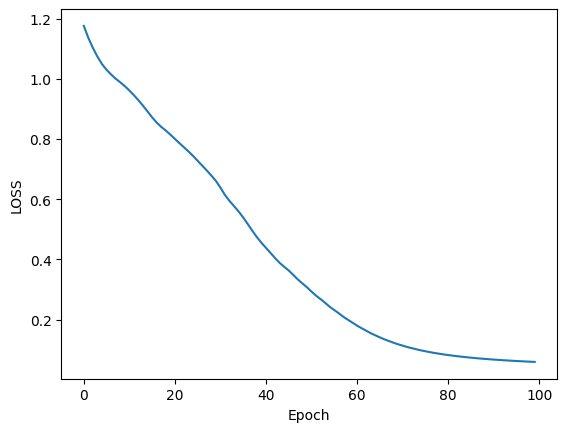

In [20]:
plt.plot(range(epochs),losses)
plt.ylabel('LOSS')
plt.xlabel('Epoch')

In [22]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [23]:
loss

tensor(0.1127)

In [25]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        
        print (f'{i+1} {str(y_val)} {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct +=1
print(f'We got {correct} correct')            

1 tensor([-2.4033,  3.7390, -1.3668]) 1
2 tensor([  7.1546,   1.9820, -11.5731]) 0
3 tensor([  7.3377,   1.7706, -11.6271]) 0
4 tensor([  7.4372,   1.7900, -11.7805]) 0
5 tensor([-1.8046,  3.7702, -2.0811]) 1
6 tensor([-2.6784,  4.1056, -1.4876]) 1
7 tensor([  7.3570,   1.9731, -11.8403]) 0
8 tensor([-8.3368,  1.3625,  6.0977]) 2
9 tensor([  6.8427,   1.8792, -11.0537]) 0
10 tensor([  7.7747,   1.7421, -12.1957]) 0
11 tensor([-1.4897,  3.5557, -2.1553]) 1
12 tensor([-2.0201,  3.6964, -1.7792]) 1
13 tensor([-10.5644,   1.2581,   8.1556]) 2
14 tensor([-9.9569,  2.2923,  6.6744]) 2
15 tensor([  6.4568,   2.0042, -10.6439]) 0
16 tensor([-5.8049,  3.0942,  2.2865]) 1
17 tensor([-6.1562,  2.5199,  3.0994]) 2
18 tensor([-3.6219,  3.7635, -0.2264]) 1
19 tensor([  8.9815,   1.6838, -13.7843]) 0
20 tensor([-8.6618,  1.4041,  6.3762]) 2
21 tensor([-7.2411,  2.2066,  4.3860]) 2
22 tensor([-2.6325,  3.8250, -1.1557]) 1
23 tensor([-7.1116,  2.2425,  4.2580]) 1
24 tensor([-2.3926,  4.0172, -1.6949]) 

In [26]:
torch.save(model.state_dict(),'my_iris_model.pt')

In [27]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [28]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [31]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

In [33]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([  6.7879,   2.3096, -11.3764])
tensor(0)
